Import Library

In [34]:
import numpy as np
import pandas as pd
import os

Merge Files

In [ ]:
# #importing them all
# #list comprehension

# files = [file for file in os.listdir("/Users/mahdiafkhami/Desktop/Purdue/FEMA data/Paper/Preliminary Damage Assessment Reports/Data")]
# #Concacenate all files into single excel file
# print (files)

['2017.xlsx', '2016.xlsx', '2019.xlsx', '2015.xlsx', '2018.xlsx']


In [ ]:
# all_data = pd.DataFrame()
# for file in files:
#     df = pd.read_excel("/Users/mahdiafkhami/Desktop/Purdue/FEMA data/Paper/Preliminary Damage Assessment Reports/Data/"+file)
#     all_data = pd.concat([all_data,df])

Read the updated dataframe

In [35]:
#data = pd.read_excel("/content/Damage_Assest/ALL.xlsx")
all_data = pd.read_excel("/content/ALL.xlsx")

In [36]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   342 non-null    object 
 1   Date                    342 non-null    object 
 2   Type                    342 non-null    object 
 3   IA                      342 non-null    int64  
 4   PA                      342 non-null    float64
 5   Residences Impacted     342 non-null    float64
 6   Destroyed               342 non-null    float64
 7   MajorDamage             342 non-null    int64  
 8   MinorDamage             342 non-null    int64  
 9   Affected                342 non-null    int64  
 10  Insured                 342 non-null    float64
 11  Low Income              342 non-null    float64
 12  Elderly                 342 non-null    float64
 13  Primary Impact          342 non-null    object 
 14  Total PA cost estimate  342 non-null    ob

In [37]:
all_data["Type"].value_counts()

Storm-Flood                                              79
Storm-Tornado-flood                                      59
Storm-Flood-Mudslide                                     40
Severe Winter Storm and Flooding                         34
Severe Storms and Tornadoes                              30
Storm--Tornado                                           30
Hurricane                                                14
Severe Winter Storm                                      12
Flooding                                                 10
Storm                                                     7
Storm                                                     4
Winter Storm & Snowstorm                                  4
Wind Storm                                                4
Severe Winter Storm and Snowstorm                         3
Severe Winter Storm,Flooding,Mudslides, and a Tornado     2
wildfire                                                  2
Snowstorm                               

In [38]:
all_data.head(5)

,State,Date,Type,IA,PA,Residences Impacted,Destroyed,MajorDamage,MinorDamage,Affected,Insured,Low Income,Elderly,Primary Impact,Total PA cost estimate,Total IA cost estimate,month
0,Alaska,2017-12-20,Storm,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,Road & Bridges,6317745,0,12
1,Mississippi,2017-11-22,Hurricane,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,"Public Parks, Recreational Facilities",14122191,0,11
2,Alabama,2017-11-16,Hurricane,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,"Public Parks, Recreational Facilities",17735820,0,11
3,New York,2017-11-14,Flooding,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,"Public Parks, Recreational Facilities",33900354,0,11
4,Kansas,2017-11-07,Storm-Flood,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,Public Buildings and Equipment,5997796,0,11


Add a month column

In [39]:
all_data["Date"] = all_data["Date"].astype(str)

In [40]:
all_data.head(5)

,State,Date,Type,IA,PA,Residences Impacted,Destroyed,MajorDamage,MinorDamage,Affected,Insured,Low Income,Elderly,Primary Impact,Total PA cost estimate,Total IA cost estimate,month
0,Alaska,2017-12-20,Storm,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,Road & Bridges,6317745,0,12
1,Mississippi,2017-11-22,Hurricane,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,"Public Parks, Recreational Facilities",14122191,0,11
2,Alabama,2017-11-16,Hurricane,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,"Public Parks, Recreational Facilities",17735820,0,11
3,New York,2017-11-14,Flooding,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,"Public Parks, Recreational Facilities",33900354,0,11
4,Kansas,2017-11-07,Storm-Flood,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,Public Buildings and Equipment,5997796,0,11


In [41]:
all_data["month"] = all_data["Date"].str[5:7]

In [42]:
all_data.head(5)

,State,Date,Type,IA,PA,Residences Impacted,Destroyed,MajorDamage,MinorDamage,Affected,Insured,Low Income,Elderly,Primary Impact,Total PA cost estimate,Total IA cost estimate,month
0,Alaska,2017-12-20,Storm,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,Road & Bridges,6317745,0,12
1,Mississippi,2017-11-22,Hurricane,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,"Public Parks, Recreational Facilities",14122191,0,11
2,Alabama,2017-11-16,Hurricane,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,"Public Parks, Recreational Facilities",17735820,0,11
3,New York,2017-11-14,Flooding,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,"Public Parks, Recreational Facilities",33900354,0,11
4,Kansas,2017-11-07,Storm-Flood,0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,Public Buildings and Equipment,5997796,0,11


In [11]:
#all_data.to_excel("/Users/mahdiafkhami/Desktop/Purdue/FEMA data/Paper/Preliminary Damage Assessment Reports/ALL.xlsx", index = False)

In [43]:
all_data["IA"].value_counts()

1    201
0    141
Name: IA, dtype: int64

In [44]:
df1 = all_data[all_data["IA"] ==1]

In [45]:
#Encoding categorical Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.Type=le.fit_transform(df1.Type)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
df1.head(2)

,State,Date,Type,IA,PA,Residences Impacted,Destroyed,MajorDamage,MinorDamage,Affected,Insured,Low Income,Elderly,Primary Impact,Total PA cost estimate,Total IA cost estimate,month
6,Louisiana,2017-10-16,6,1,1.0,312.0,19.0,48,226,19,3.2,75.0,84.3,Emergency Protective Measures,8301657,2794004,10
11,West Virginia,2017-08-18,9,1,1.0,793.0,29.0,132,306,326,6.0,81.0,20.0,Road & Bridges,8528124,5706020,08


In [ ]:
#create dummy Variables, so there is no order ==> OneHotEncoder

In [47]:
null_v = df1.isnull().sum()
print(null_v)

State                     0
Date                      0
Type                      0
IA                        0
PA                        0
Residences Impacted       0
Destroyed                 0
MajorDamage               0
MinorDamage               0
Affected                  0
Insured                   0
Low Income                0
Elderly                   0
Primary Impact            0
Total PA cost estimate    0
Total IA cost estimate    0
month                     0
dtype: int64


In [48]:
df1 = df1.drop(["Primary Impact","Elderly","Total PA cost estimate"], axis = 1)

In [49]:
df1.head(2)

,State,Date,Type,IA,PA,Residences Impacted,Destroyed,MajorDamage,MinorDamage,Affected,Insured,Low Income,Total IA cost estimate,month
6,Louisiana,2017-10-16,6,1,1.0,312.0,19.0,48,226,19,3.2,75.0,2794004,10
11,West Virginia,2017-08-18,9,1,1.0,793.0,29.0,132,306,326,6.0,81.0,5706020,08


# Outlier

In [50]:
df1 = df1.iloc[:,5:-1]
df1.head()

,Residences Impacted,Destroyed,MajorDamage,MinorDamage,Affected,Insured,Low Income,Total IA cost estimate
6,312.0,19.0,48,226,19,3.20,75.0,2794004
11,793.0,29.0,132,306,326,6.00,81.0,5706020
16,941.0,8.0,310,367,256,28.20,19.7,7288861
22,212.0,46.0,67,47,52,14.00,35.0,2118747
24,827.0,41.0,310,233,243,8.83,52.1,9603344


In [51]:
from scipy import stats
z = abs(stats.zscore(df1))
print(z)

[[0.40866797 0.3599869  0.39348647 ... 0.90333087 2.19150892 0.50737135]
 [0.24926464 0.34833825 0.33133436 ... 0.80981719 2.50153607 0.35791445]
 [0.20021746 0.37280042 0.19963108 ... 0.06838728 0.66590798 0.2766764 ]
 ...
 [0.37052385 0.23686062 0.07310714 ... 0.02062851 2.37752521 0.5246034 ]
 [0.38732582 0.22509548 0.10936254 ... 0.06437955 2.70563727 0.47500451]
 [0.4041278  0.21333034 0.34613248 ... 0.1081306  3.03374934 0.39586138]]


In [52]:
np.shape(z)

(201, 8)

In [53]:
threshold = 3
row_del=np.where(np.array(z) > 3)[0]

In [54]:
llp=[list(row_del.T)]
df1 = df1.drop(df1.index[llp])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:4107: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 6 to 340
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Residences Impacted     186 non-null    float64
 1   Destroyed               186 non-null    float64
 2   MajorDamage             186 non-null    int64  
 3   MinorDamage             186 non-null    int64  
 4   Affected                186 non-null    int64  
 5   Insured                 186 non-null    float64
 6   Low Income              186 non-null    float64
 7   Total IA cost estimate  186 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 13.1 KB


In [56]:
Y = df1["Total IA cost estimate"]

In [57]:
Y

6       2794004
11      5706020
16      7288861
22      2118747
24      9603344
         ...   
336     2721659
337     3424639
338    20392577
339     2458255
340     3424639
Name: Total IA cost estimate, Length: 186, dtype: int64

In [58]:
df1.head()

,Residences Impacted,Destroyed,MajorDamage,MinorDamage,Affected,Insured,Low Income,Total IA cost estimate
6,312.0,19.0,48,226,19,3.20,75.0,2794004
11,793.0,29.0,132,306,326,6.00,81.0,5706020
16,941.0,8.0,310,367,256,28.20,19.7,7288861
22,212.0,46.0,67,47,52,14.00,35.0,2118747
24,827.0,41.0,310,233,243,8.83,52.1,9603344


In [59]:
X = df1.iloc[:,:-1]

In [60]:
X

,Residences Impacted,Destroyed,MajorDamage,MinorDamage,Affected,Insured,Low Income
6,312.0,19.0,48,226,19,3.20,75.00
11,793.0,29.0,132,306,326,6.00,81.00
16,941.0,8.0,310,367,256,28.20,19.70
22,212.0,46.0,67,47,52,14.00,35.00
24,827.0,41.0,310,233,243,8.83,52.10
...,...,...,...,...,...,...,...
336,579.2,94.4,107,213,177,33.56,59.55
337,528.5,104.5,185,351,42,32.25,65.90
338,477.8,114.6,631,684,92,30.94,72.25
339,427.1,124.7,481,569,142,29.63,78.60


In [61]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                              
Dep. Variable:     Total IA cost estimate   R-squared:                       0.577
Model:                                OLS   Adj. R-squared:                  0.561
Method:                     Least Squares   F-statistic:                     34.74
Date:                    Tue, 20 Oct 2020   Prob (F-statistic):           3.11e-30
Time:                            21:51:44   Log-Likelihood:                -3197.9
No. Observations:                     186   AIC:                             6412.
Df Residuals:                         178   BIC:                             6438.
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [64]:
X = df1[["Destroyed","MajorDamage","Affected","Insured"]]

In [65]:
X

,Destroyed,MajorDamage,Affected,Insured
6,19.0,48,19,3.20
11,29.0,132,326,6.00
16,8.0,310,256,28.20
22,46.0,67,52,14.00
24,41.0,310,243,8.83
...,...,...,...,...
336,94.4,107,177,33.56
337,104.5,185,42,32.25
338,114.6,631,92,30.94
339,124.7,481,142,29.63


In [66]:
import seaborn as sns

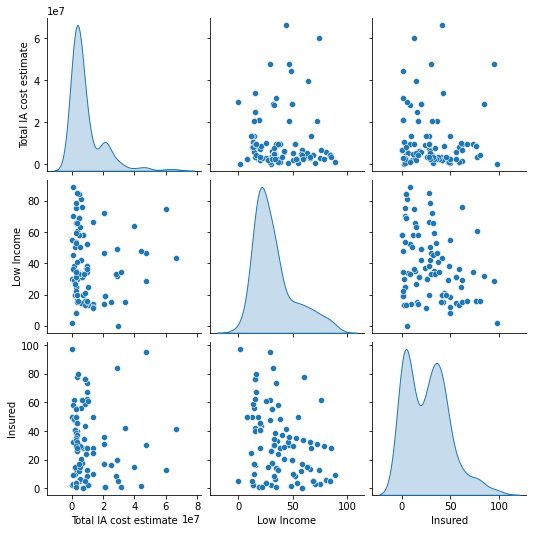

In [67]:
sns.pairplot(df1[["Total IA cost estimate", "Low Income", "Insured"]], diag_kind="kde")

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show>

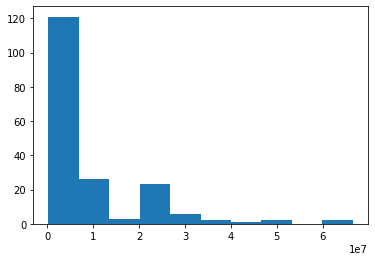

In [69]:
plt.hist(Y)
plt.show

# Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state= 0)

In [72]:
X_train.shape, Y_train.shape, X_test.shape, Y_test. shape

((139, 4), (139,), (47, 4), (47,))

In [73]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# no differnce to where to do the scaling

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
reg.coef_

array([ 2195923.22555212,  6831425.27407519,  2600965.93124909,
       -4471603.61371325])

In [77]:
reg.intercept_

9608748.834532375

In [78]:
reg.score(X_test,Y_test)

0.5252433631369677

In [79]:
for X,Y in list(zip(X_test, Y_test))[:10]:
    print(f"model predicts {reg.predict([X])[0]}, real value: {Y}")

model predicts 8514656.232496839, real value: 2898144
model predicts 10768110.411272034, real value: 8217565
model predicts 9703323.044503525, real value: 4442309
model predicts 15663764.94452927, real value: 21213290
model predicts 1414956.45816035, real value: 1866271
model predicts 15663764.94452927, real value: 21213290
model predicts 8967760.755297616, real value: 223932
model predicts 8514656.232496839, real value: 2898144
model predicts 1414956.45816035, real value: 1866271
model predicts 9012513.361696396, real value: 9047850


In [80]:
y_predict = reg.predict(X_test)

In [81]:
r2_score(Y_test, y_predict)

0.5252433631369677

In [82]:
mean_squared_error(Y_test, y_predict)

25127364616090.387

In [83]:
y_predict

array([ 8514656.23249684, 10768110.41127203,  9703323.04450352,
       15663764.94452927,  1414956.45816035, 15663764.94452927,
        8967760.75529762,  8514656.23249684,  1414956.45816035,
        9012513.3616964 , 17640127.51033275, -8480333.57575349,
        1414956.45816035,  2628422.13319748, -5210667.44480445,
        8514656.23249684,  8839562.38891315, 15663764.94452927,
        1340736.13900043,  1414956.45816035,  4076236.1990343 ,
        4076236.1990343 , 15711832.4501983 ,  1414956.45816035,
        1326856.83773798,   582418.28054327,  4076236.1990343 ,
       15663764.94452927,  4718631.23376929, 17999516.38604028,
       12760486.01619779,  4875759.06038643,  7084982.89235304,
        3303711.05427783,  9746972.05363486,  8213024.68714815,
        9906429.86419552,  1414956.45816035,  1414956.45816035,
       12760486.01619779,  4076236.1990343 ,  2628422.13319748,
        4076236.1990343 ,  4076236.1990343 ,  1414956.45816035,
        8839562.38891315, 11146060.97405

In [84]:
dw = np.array(y_predict).tolist()

In [85]:
dw

[8514656.232496839,
 10768110.411272034,
 9703323.044503525,
 15663764.944529273,
 1414956.45816035,
 15663764.944529273,
 8967760.755297616,
 8514656.232496839,
 1414956.45816035,
 9012513.361696396,
 17640127.51033275,
 -8480333.575753493,
 1414956.45816035,
 2628422.1331974827,
 -5210667.4448044505,
 8514656.232496839,
 8839562.388913145,
 15663764.944529273,
 1340736.1390004326,
 1414956.45816035,
 4076236.1990343016,
 4076236.1990343016,
 15711832.4501983,
 1414956.45816035,
 1326856.8377379775,
 582418.2805432733,
 4076236.1990343016,
 15663764.944529273,
 4718631.23376929,
 17999516.386040278,
 12760486.01619779,
 4875759.060386433,
 7084982.892353036,
 3303711.0542778317,
 9746972.053634858,
 8213024.687148145,
 9906429.864195524,
 1414956.45816035,
 1414956.45816035,
 12760486.01619779,
 4076236.1990343016,
 2628422.1331974827,
 4076236.1990343016,
 4076236.1990343016,
 1414956.45816035,
 8839562.388913147,
 11146060.974052742]

<function matplotlib.pyplot.show>

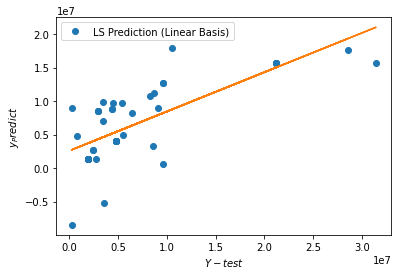

In [86]:
plt.plot(Y_test, dw,'o',label='LS Prediction (Linear Basis)')
plt.xlabel("$Y-test$")
plt.ylabel("$y_Predict$")
plt.legend()
#Adding the slope line
m, b = np.polyfit(Y_test, dw, 1)
plt.plot(Y_test, m*Y_test + b)
plt.show